# customer activation and retention
Project 3

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# Loading the data sets:

In [2]:
df=pd.read_excel("customer_retention_dataset.xlsx")
pd.set_option('display.max_columns',None)
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [3]:
df.shape

(269, 71)

In [4]:
df.nunique()
#pd.set_option('display.max_rows',None)

1Gender of respondent                                                    2
2 How old are you?                                                       5
3 Which city do you shop online from?                                   11
4 What is the Pin Code of where you shop online from?                   39
5 Since How Long You are Shopping Online ?                               5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

In [5]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

# EDA

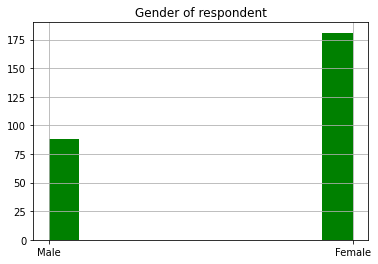

In [7]:
df["1Gender of respondent"].hist(grid=True,color='green')
plt.title("Gender of respondent")
plt.show()

<AxesSubplot:xlabel='2 How old are you? ', ylabel='count'>

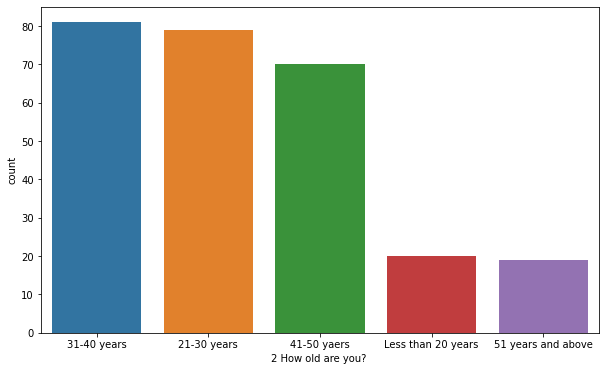

In [8]:
plt.subplots(figsize=(10,6))
sns.countplot(df['2 How old are you? '])

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

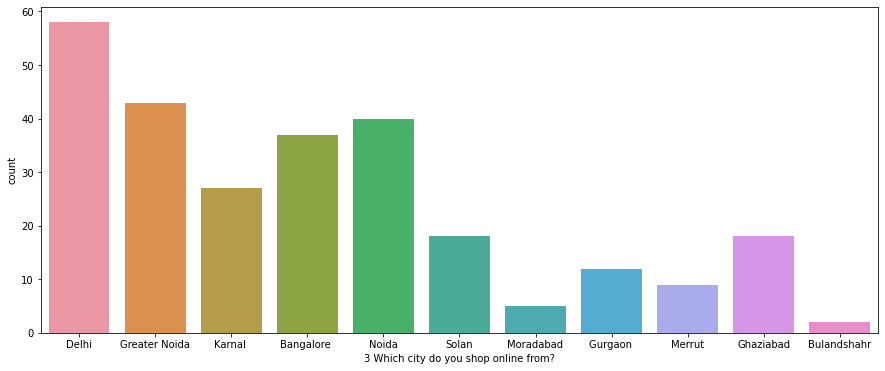

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot(df['3 Which city do you shop online from?'])

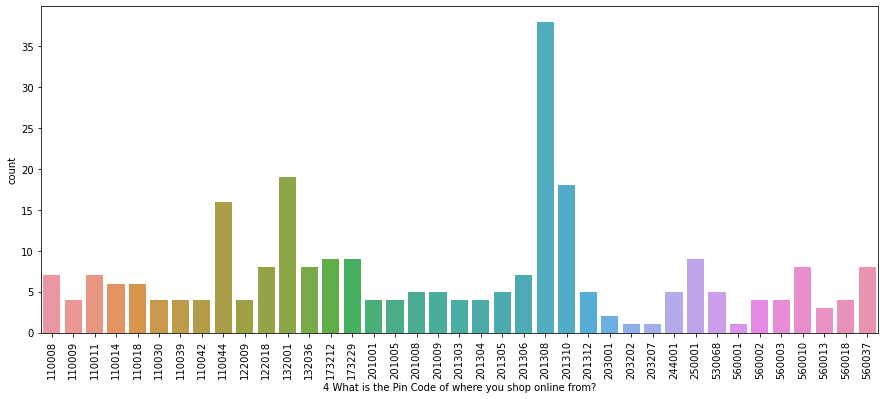

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(df['4 What is the Pin Code of where you shop online from?'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='5 Since How Long You are Shopping Online ?', ylabel='count'>

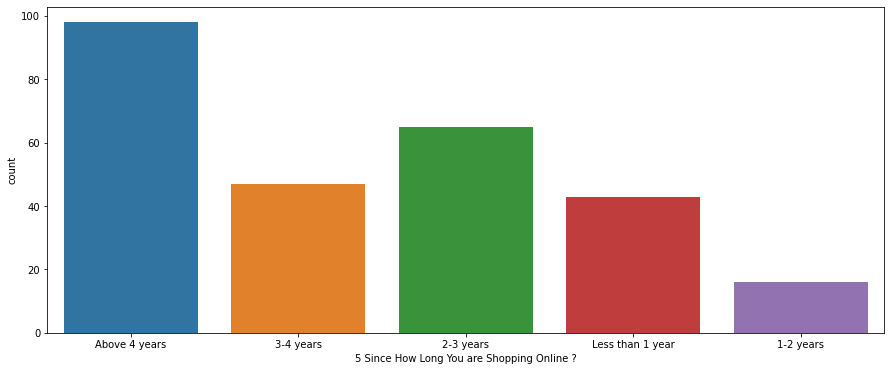

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot(df['5 Since How Long You are Shopping Online ?'])

<AxesSubplot:xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='count'>

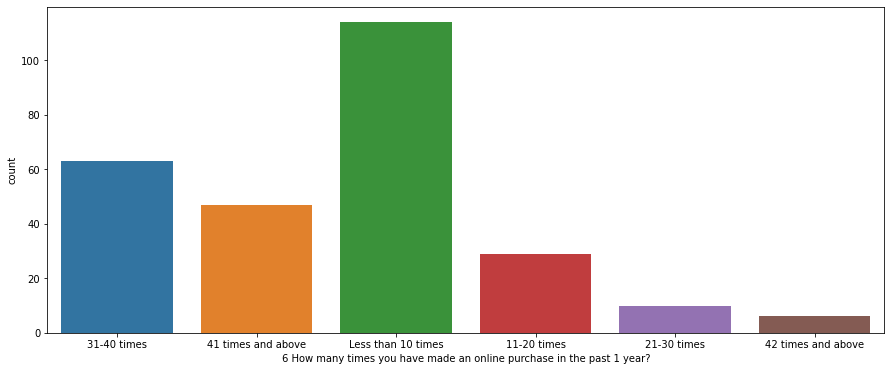

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot(df['6 How many times you have made an online purchase in the past 1 year?'])

<AxesSubplot:xlabel='7 How do you access the internet while shopping on-line?', ylabel='count'>

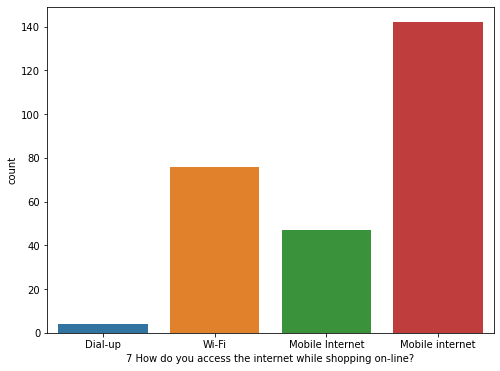

In [13]:
plt.subplots(figsize=(8,6))
sns.countplot(df['7 How do you access the internet while shopping on-line?'])

In [14]:
df["7 How do you access the internet while shopping on-line?"].value_counts()

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

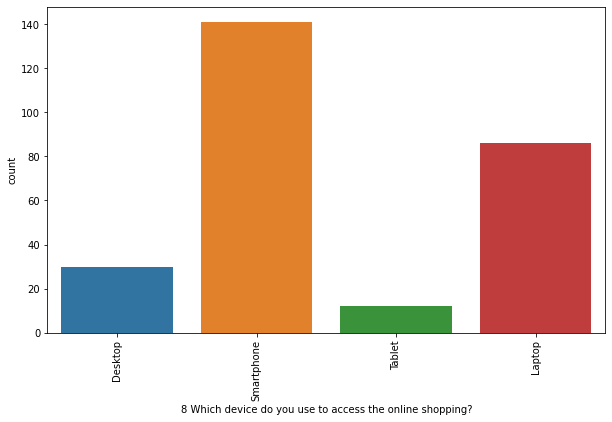

In [15]:
plt.subplots(figsize=(10,6))
sns.countplot(df['8 Which device do you use to access the online shopping?'])
plt.xticks(rotation=90)
plt.show()

# Removing white space infront and back of all column names:

In [16]:
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.lstrip()

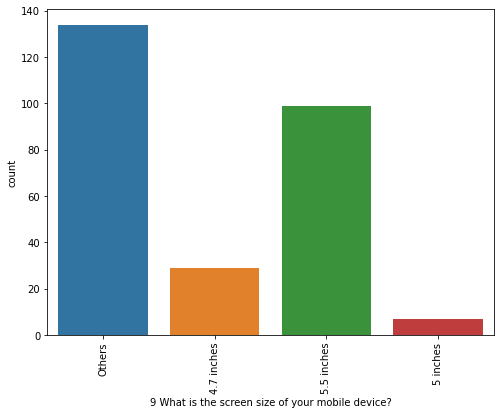

In [17]:
plt.subplots(figsize=(8,6))
sns.countplot(df['9 What is the screen size of your mobile device?'])
plt.xticks(rotation=90)
plt.show()

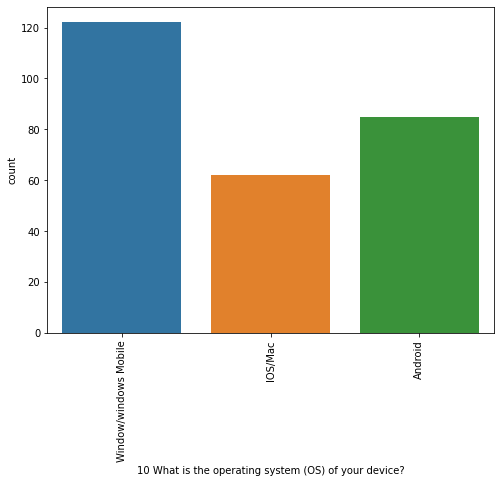

In [18]:
plt.subplots(figsize=(8,6))
sns.countplot(df['10 What is the operating system (OS) of your device?'])
plt.xticks(rotation=90)
plt.show()

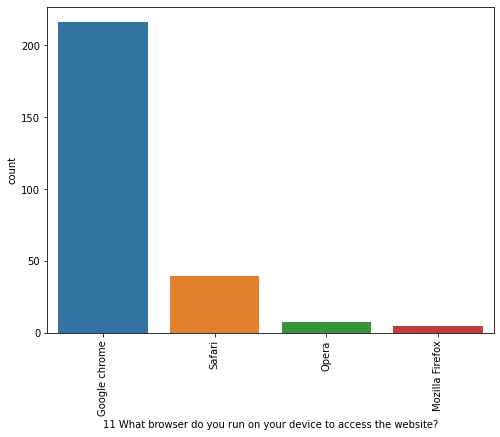

In [19]:
plt.subplots(figsize=(8,6))
sns.countplot(df['11 What browser do you run on your device to access the website?'])
plt.xticks(rotation=90)
plt.show()

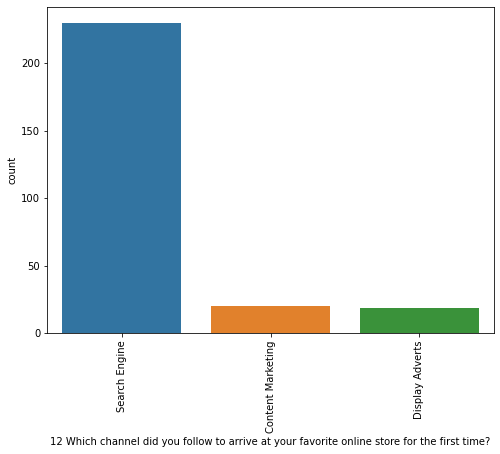

In [20]:
plt.subplots(figsize=(8,6))
sns.countplot(df['12 Which channel did you follow to arrive at your favorite online store for the first time?'])
plt.xticks(rotation=90)
plt.show()

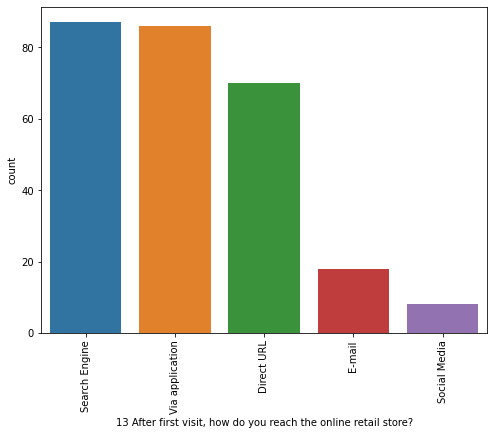

In [21]:
plt.subplots(figsize=(8,6))
sns.countplot(df['13 After first visit, how do you reach the online retail store?'])
plt.xticks(rotation=90)
plt.show()

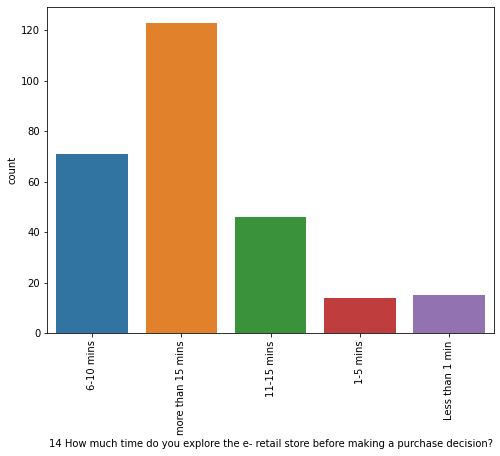

In [22]:
plt.subplots(figsize=(8,6))
sns.countplot(df['14 How much time do you explore the e- retail store before making a purchase decision?'])
plt.xticks(rotation=90)
plt.show()

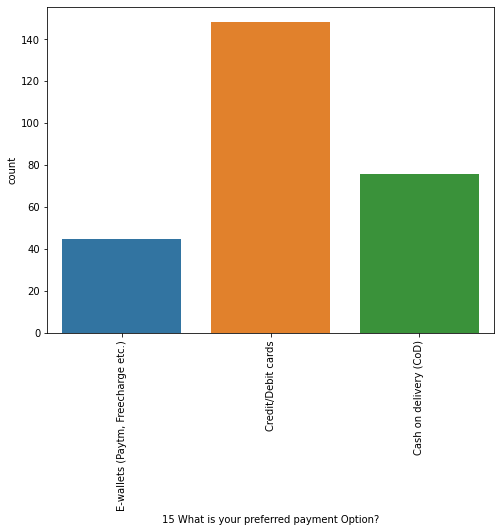

In [23]:
plt.subplots(figsize=(8,6))
sns.countplot(df['15 What is your preferred payment Option?'])
plt.xticks(rotation=90)
plt.show()

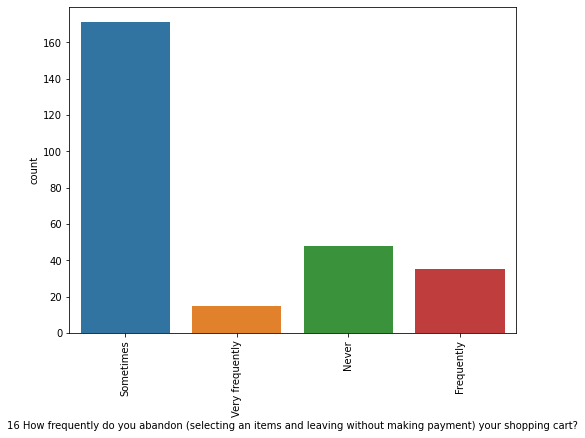

In [24]:
plt.subplots(figsize=(8,6))
sns.countplot(df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'])
plt.xticks(rotation=90)
plt.show()

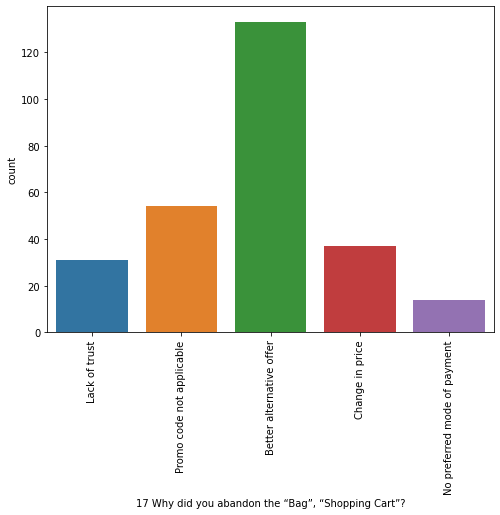

In [25]:
plt.subplots(figsize=(8,6))
sns.countplot(df['17 Why did you abandon the “Bag”, “Shopping Cart”?'])
plt.xticks(rotation=90)
plt.show()

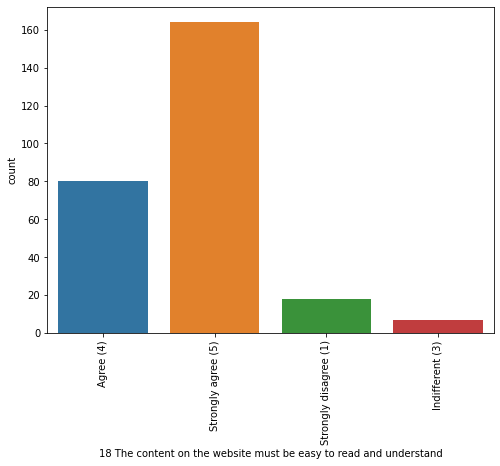

In [26]:
plt.subplots(figsize=(8,6))
sns.countplot(df['18 The content on the website must be easy to read and understand'])
plt.xticks(rotation=90)
plt.show()

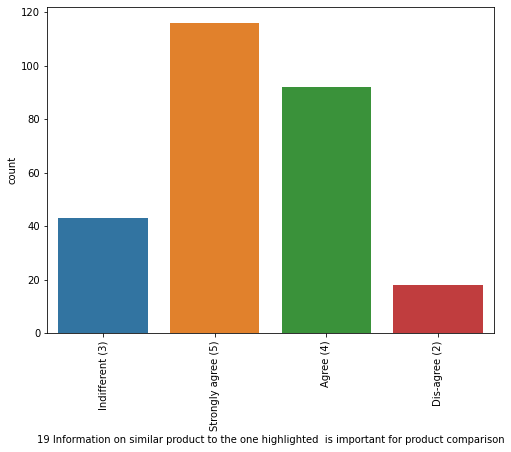

In [27]:
plt.subplots(figsize=(8,6))
sns.countplot(df['19 Information on similar product to the one highlighted  is important for product comparison'])
plt.xticks(rotation=90)
plt.show()

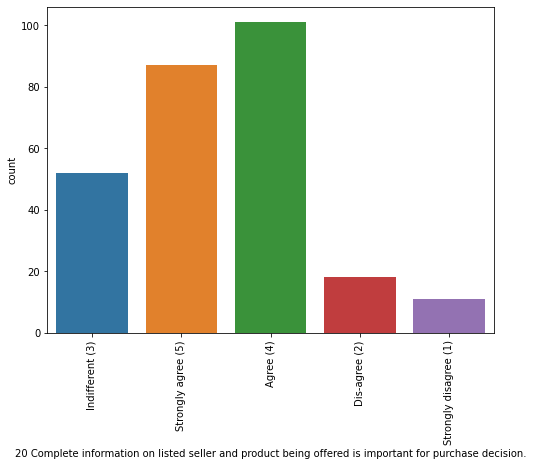

In [28]:
plt.subplots(figsize=(8,6))
sns.countplot(df['20 Complete information on listed seller and product being offered is important for purchase decision.'])
plt.xticks(rotation=90)
plt.show()

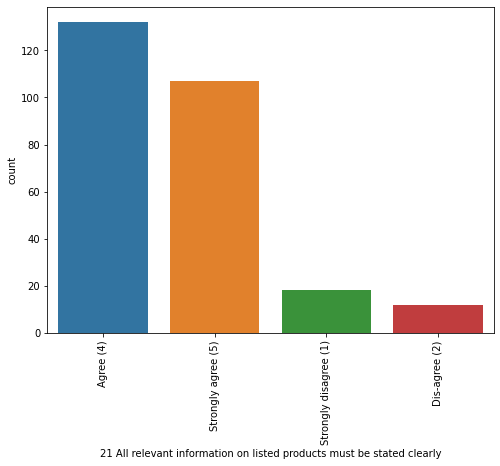

In [29]:
plt.subplots(figsize=(8,6))
sns.countplot(df['21 All relevant information on listed products must be stated clearly'])
plt.xticks(rotation=90)
plt.show()

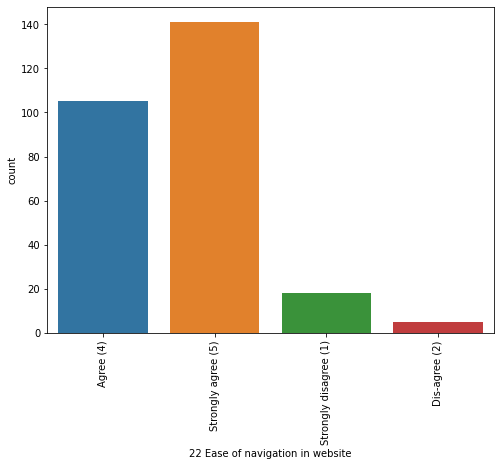

In [30]:
plt.subplots(figsize=(8,6))
sns.countplot(df['22 Ease of navigation in website'])
plt.xticks(rotation=90)
plt.show()

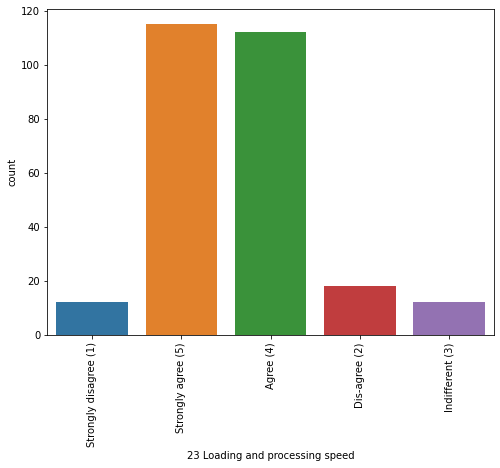

In [31]:
plt.subplots(figsize=(8,6))
sns.countplot(df['23 Loading and processing speed'])
plt.xticks(rotation=90)
plt.show()

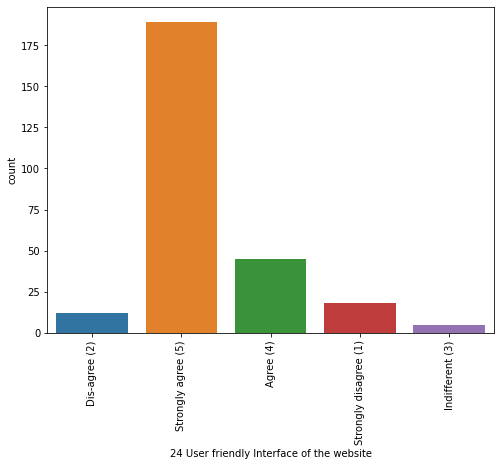

In [32]:
plt.subplots(figsize=(8,6))
sns.countplot(df['24 User friendly Interface of the website'])
plt.xticks(rotation=90)
plt.show()

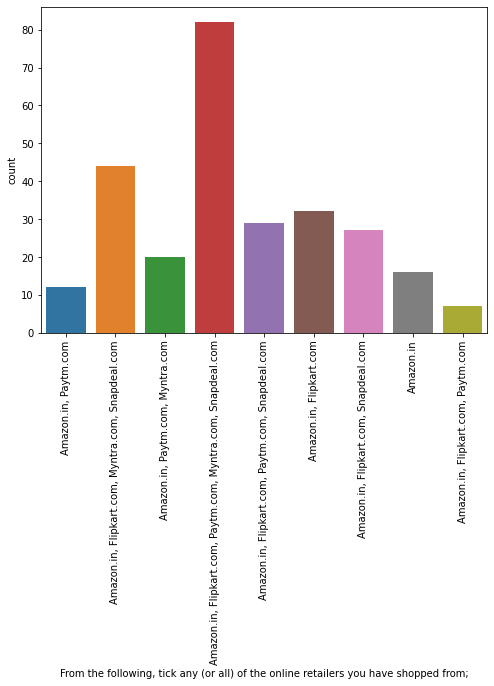

In [33]:
plt.subplots(figsize=(8,6))
sns.countplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'])
plt.xticks(rotation=90)
plt.show()

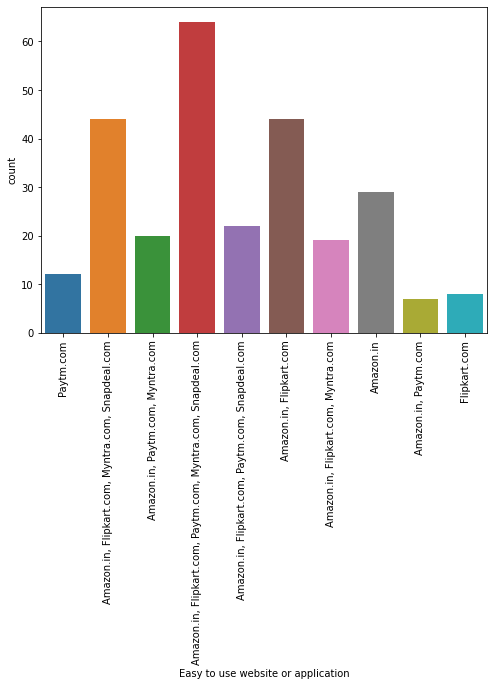

In [34]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Easy to use website or application'])
plt.xticks(rotation=90)
plt.show()

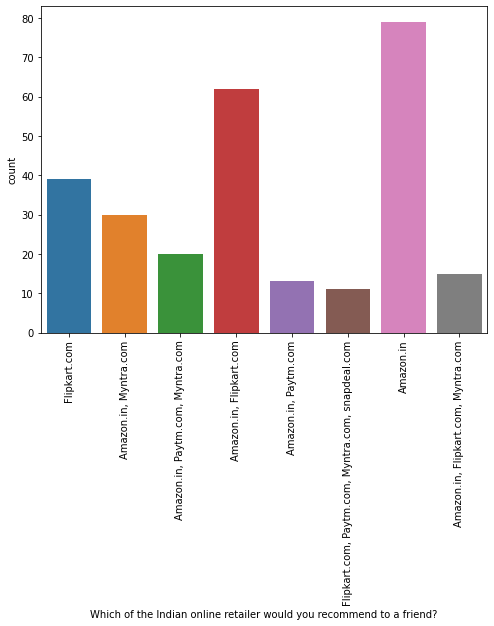

In [35]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'])
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis:

<AxesSubplot:title={'center':'Data Analysis '}, xlabel='3 Which city do you shop online from?', ylabel='2 How old are you?'>

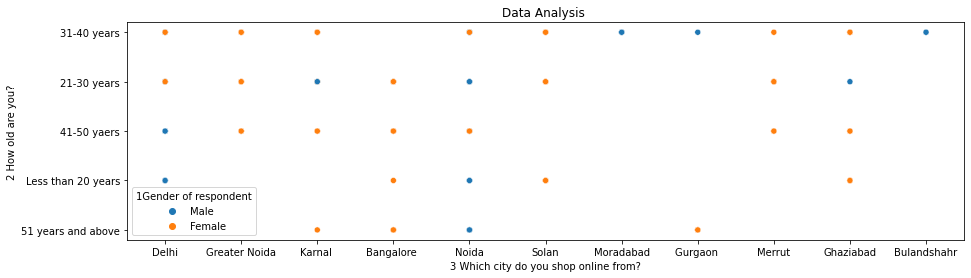

In [36]:
plt.figure(figsize=[15,4])
plt.title('Data Analysis ')
sns.scatterplot(df['3 Which city do you shop online from?'],df['2 How old are you?'],hue=df['1Gender of respondent'])

<AxesSubplot:title={'center':'Data Analysis '}, xlabel='5 Since How Long You are Shopping Online ?', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

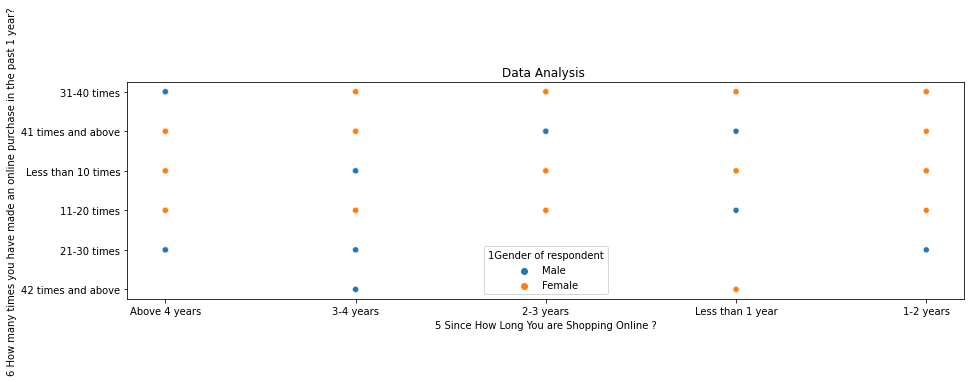

In [37]:
plt.figure(figsize=[15,4])
plt.title('Data Analysis ')
sns.scatterplot(df['5 Since How Long You are Shopping Online ?'],df['6 How many times you have made an online purchase in the past 1 year?'],hue=df['1Gender of respondent'])

<AxesSubplot:title={'center':'Data Analysis '}, xlabel='Privacy of customers’ information', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

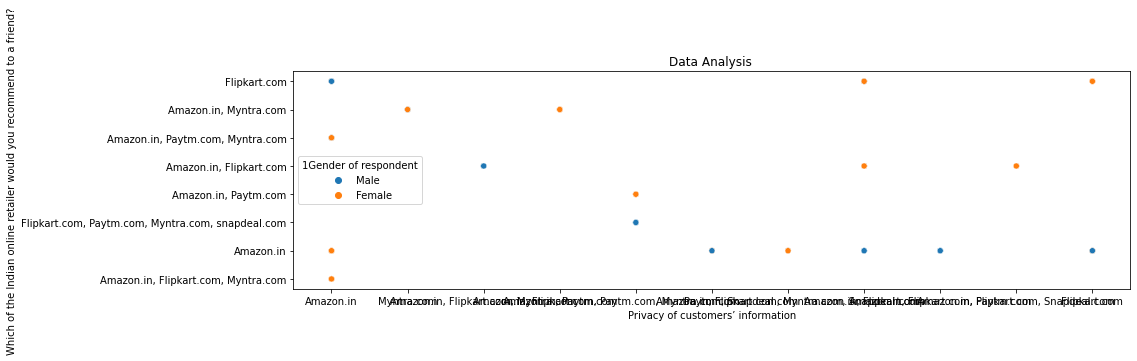

In [38]:
plt.figure(figsize=[15,4])
plt.title('Data Analysis ')
sns.scatterplot(df['Privacy of customers’ information'],df['Which of the Indian online retailer would you recommend to a friend?'],hue=df['1Gender of respondent'])

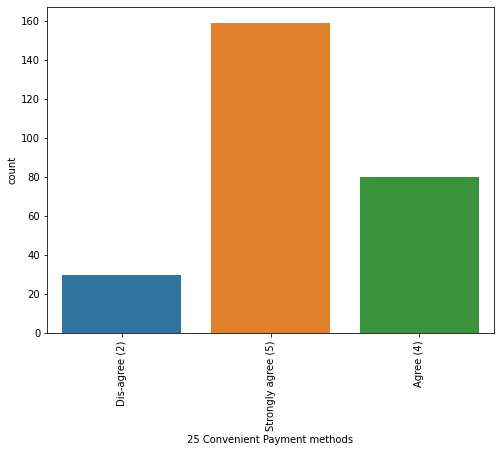

In [39]:
plt.subplots(figsize=(8,6))
sns.countplot(df['25 Convenient Payment methods'])
plt.xticks(rotation=90)
plt.show()

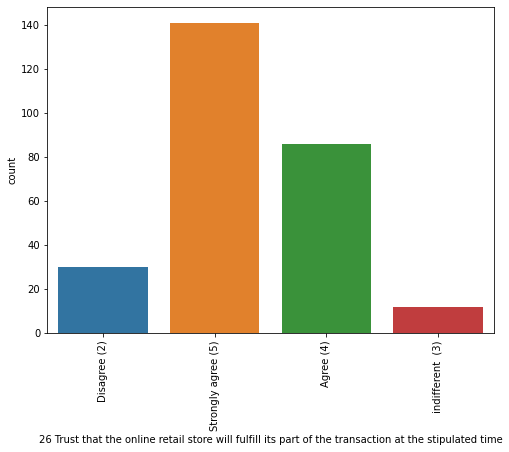

In [40]:
plt.subplots(figsize=(8,6))
sns.countplot(df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'])
plt.xticks(rotation=90)
plt.show()

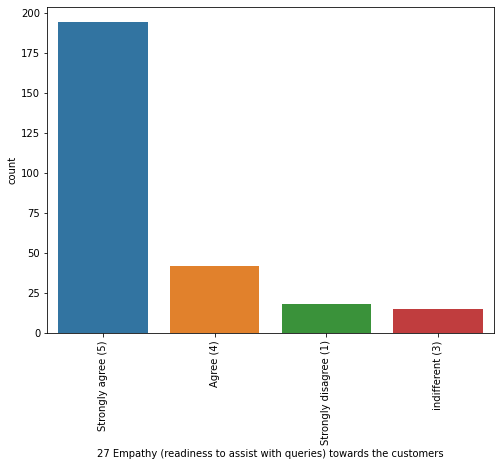

In [41]:
plt.subplots(figsize=(8,6))
sns.countplot(df['27 Empathy (readiness to assist with queries) towards the customers'])
plt.xticks(rotation=90)
plt.show()

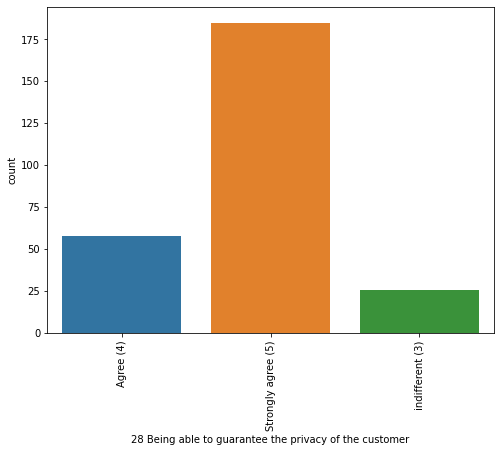

In [42]:
plt.subplots(figsize=(8,6))
sns.countplot(df['28 Being able to guarantee the privacy of the customer'])
plt.xticks(rotation=90)
plt.show()

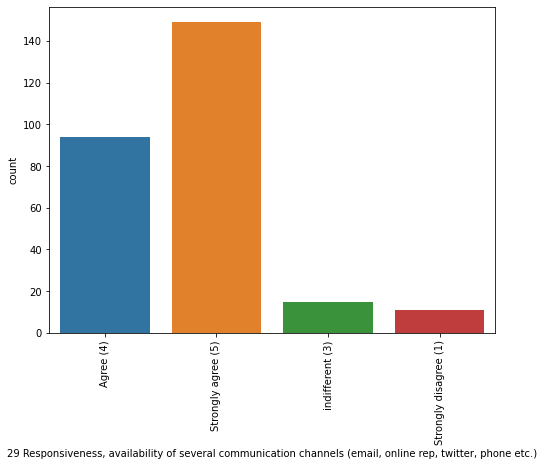

In [43]:
plt.subplots(figsize=(8,6))
sns.countplot(df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'])
plt.xticks(rotation=90)
plt.show()

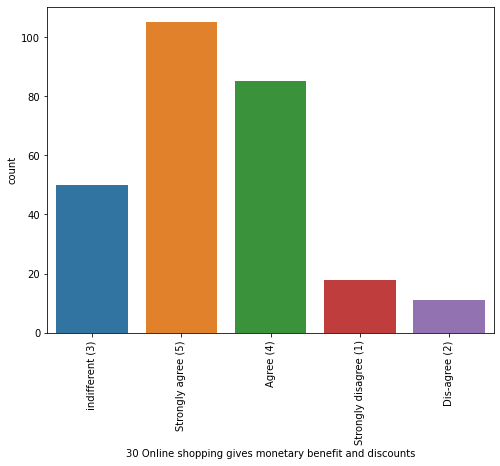

In [44]:
plt.subplots(figsize=(8,6))
sns.countplot(df['30 Online shopping gives monetary benefit and discounts'])
plt.xticks(rotation=90)
plt.show()

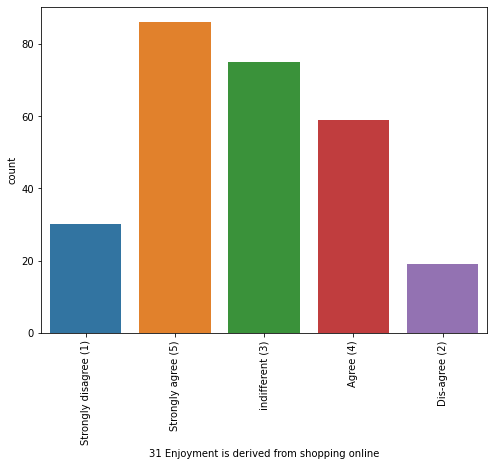

In [45]:
plt.subplots(figsize=(8,6))
sns.countplot(df['31 Enjoyment is derived from shopping online'])
plt.xticks(rotation=90)
plt.show()

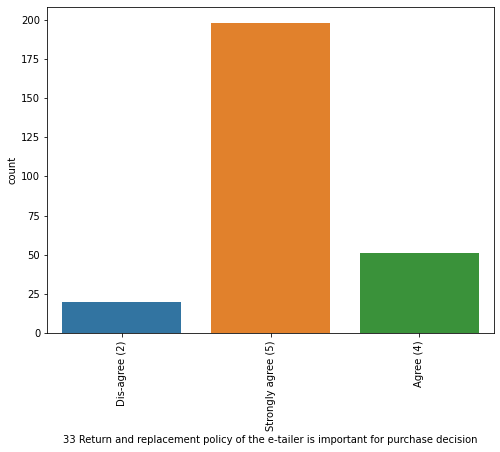

In [46]:
plt.subplots(figsize=(8,6))
sns.countplot(df['33 Return and replacement policy of the e-tailer is important for purchase decision'])
plt.xticks(rotation=90)
plt.show()

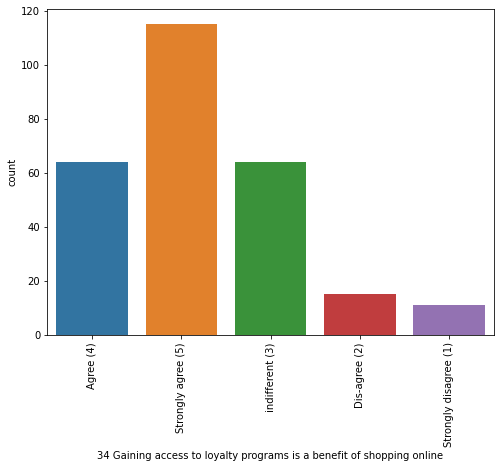

In [47]:
plt.subplots(figsize=(8,6))
sns.countplot(df['34 Gaining access to loyalty programs is a benefit of shopping online'])
plt.xticks(rotation=90)
plt.show()

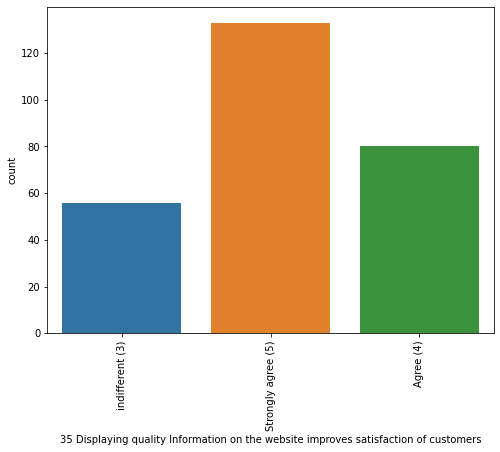

In [48]:
plt.subplots(figsize=(8,6))
sns.countplot(df['35 Displaying quality Information on the website improves satisfaction of customers'])
plt.xticks(rotation=90)
plt.show()

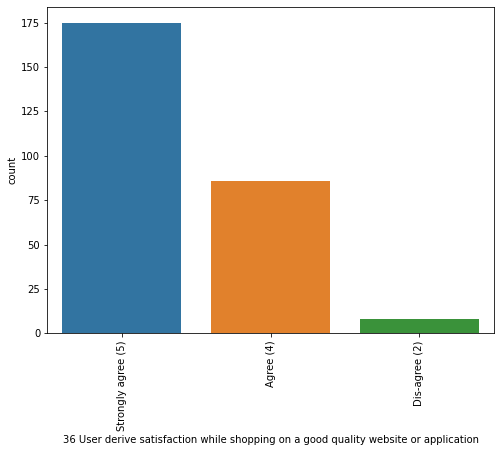

In [49]:
plt.subplots(figsize=(8,6))
sns.countplot(df['36 User derive satisfaction while shopping on a good quality website or application'])
plt.xticks(rotation=90)
plt.show()

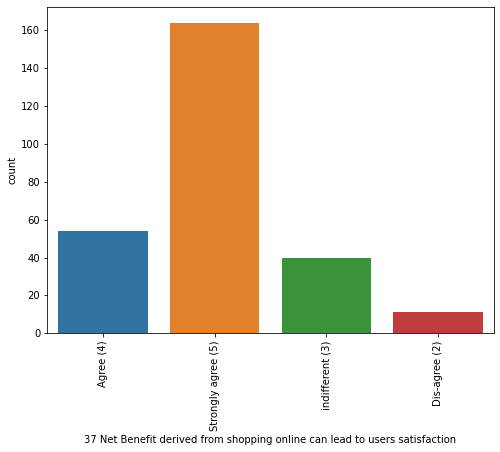

In [50]:
plt.subplots(figsize=(8,6))
sns.countplot(df['37 Net Benefit derived from shopping online can lead to users satisfaction'])
plt.xticks(rotation=90)
plt.show()

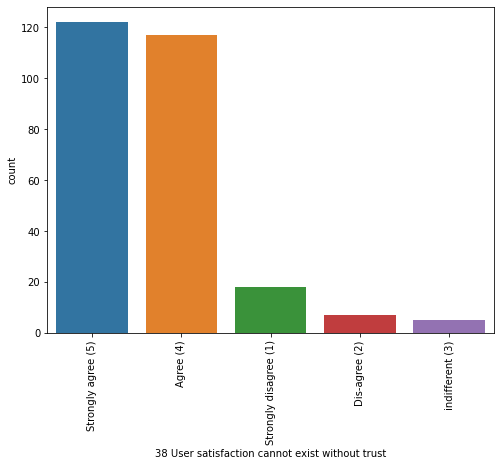

In [51]:
plt.subplots(figsize=(8,6))
sns.countplot(df['38 User satisfaction cannot exist without trust'])
plt.xticks(rotation=90)
plt.show()

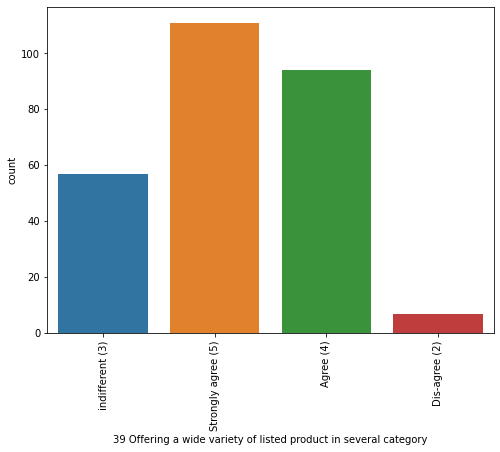

In [52]:
plt.subplots(figsize=(8,6))
sns.countplot(df['39 Offering a wide variety of listed product in several category'])
plt.xticks(rotation=90)
plt.show()

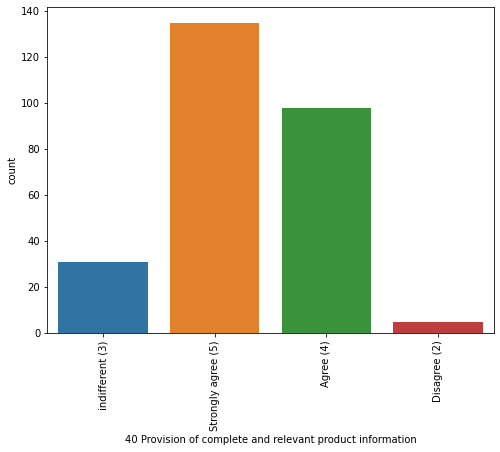

In [53]:
plt.subplots(figsize=(8,6))
sns.countplot(df['40 Provision of complete and relevant product information'])
plt.xticks(rotation=90)
plt.show()

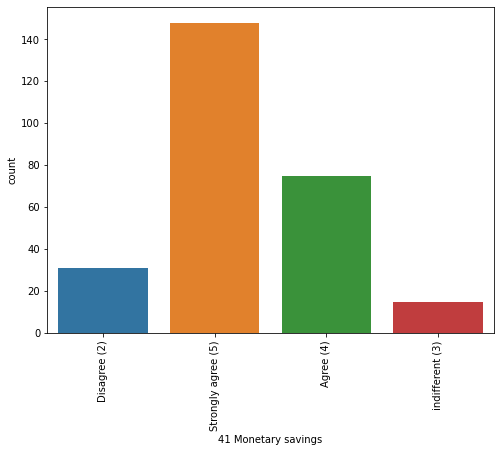

In [54]:
plt.subplots(figsize=(8,6))
sns.countplot(df['41 Monetary savings'])
plt.xticks(rotation=90)
plt.show()

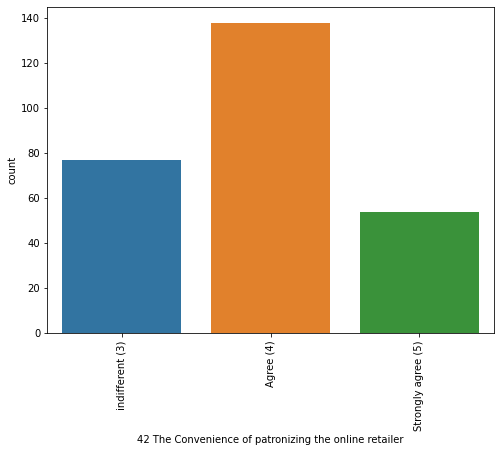

In [55]:
plt.subplots(figsize=(8,6))
sns.countplot(df['42 The Convenience of patronizing the online retailer'])
plt.xticks(rotation=90)
plt.show()

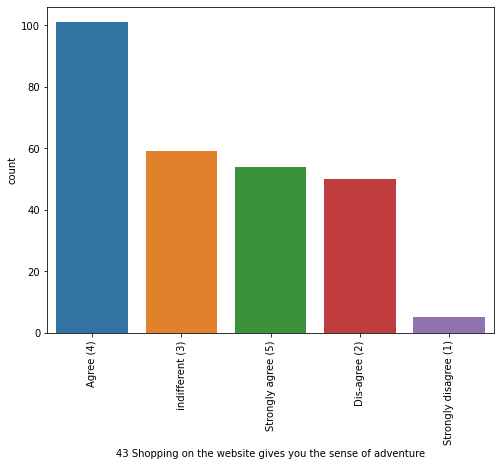

In [56]:
plt.subplots(figsize=(8,6))
sns.countplot(df['43 Shopping on the website gives you the sense of adventure'])
plt.xticks(rotation=90)
plt.show()

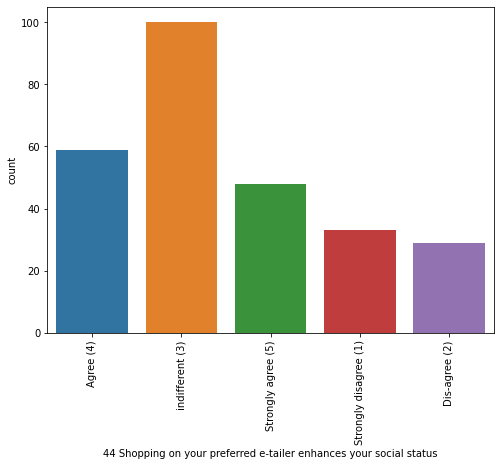

In [57]:
plt.subplots(figsize=(8,6))
sns.countplot(df['44 Shopping on your preferred e-tailer enhances your social status'])
plt.xticks(rotation=90)
plt.show()

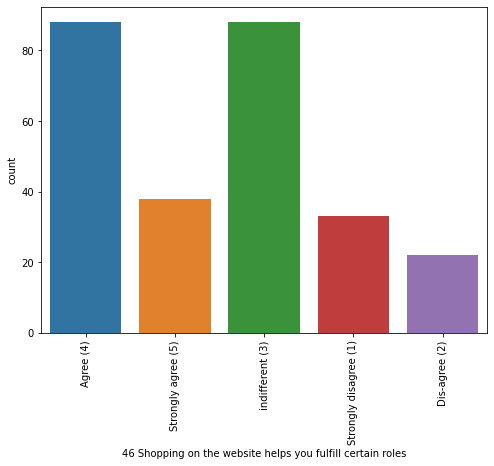

In [58]:
plt.subplots(figsize=(8,6))
sns.countplot(df['46 Shopping on the website helps you fulfill certain roles'])
plt.xticks(rotation=90)
plt.show()

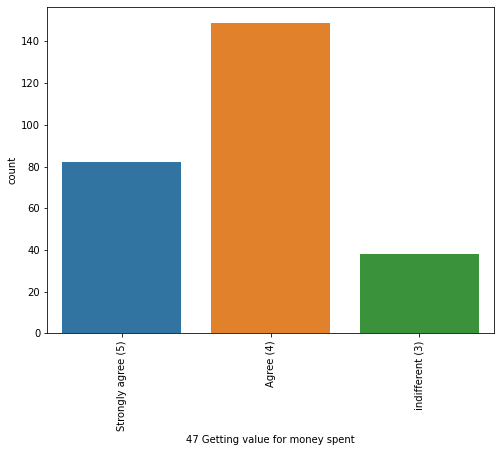

In [59]:
plt.subplots(figsize=(8,6))
sns.countplot(df['47 Getting value for money spent'])
plt.xticks(rotation=90)
plt.show()

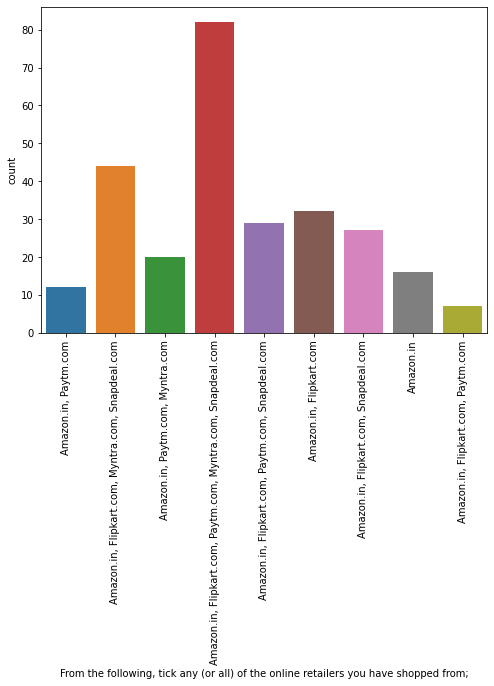

In [60]:
plt.subplots(figsize=(8,6))
sns.countplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'])
plt.xticks(rotation=90)
plt.show()

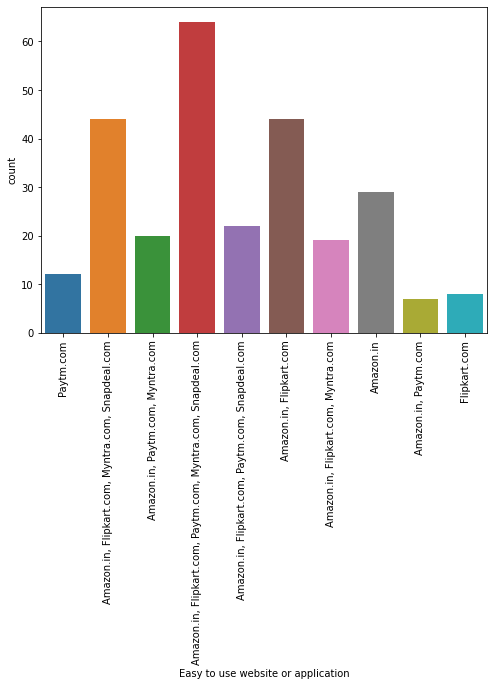

In [61]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Easy to use website or application'])
plt.xticks(rotation=90)
plt.show()

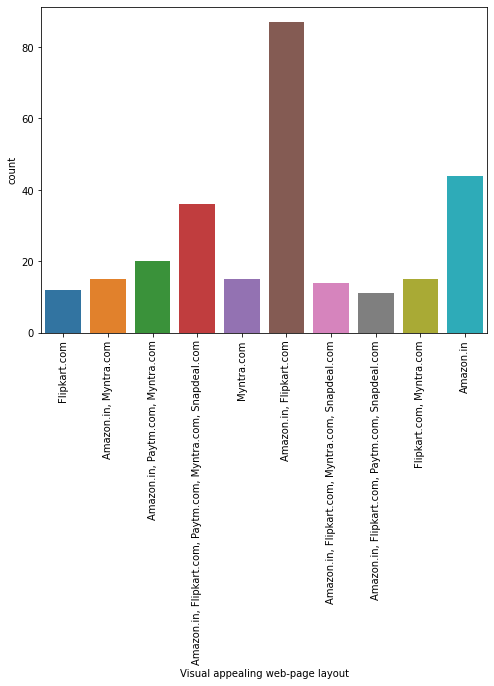

In [62]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Visual appealing web-page layout'])
plt.xticks(rotation=90)
plt.show()

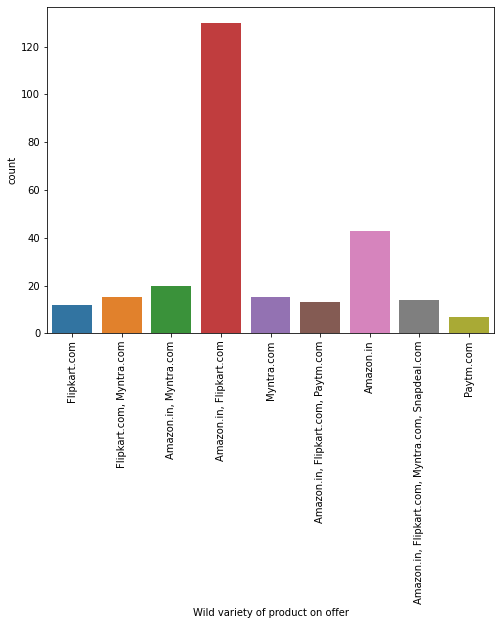

In [63]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Wild variety of product on offer'])
plt.xticks(rotation=90)
plt.show()

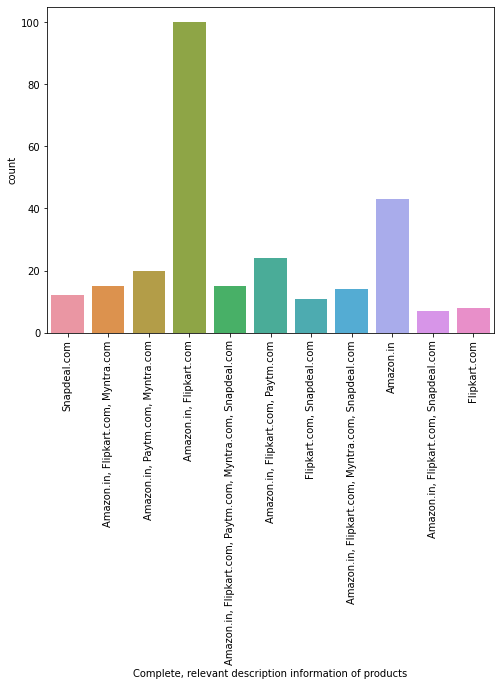

In [64]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Complete, relevant description information of products'])
plt.xticks(rotation=90)
plt.show()

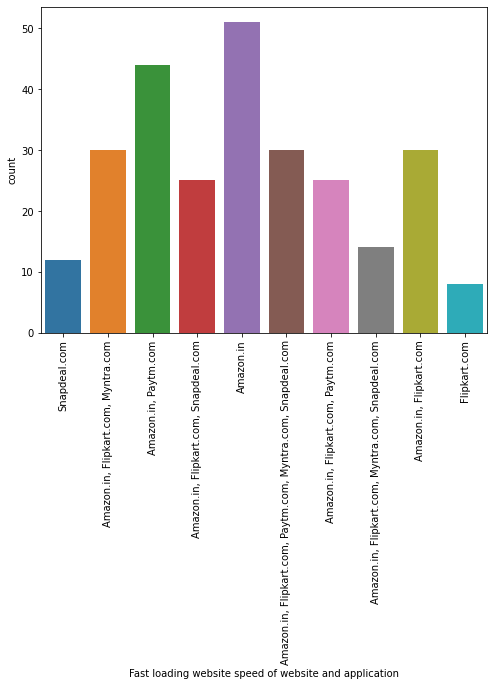

In [65]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Fast loading website speed of website and application'])
plt.xticks(rotation=90)
plt.show()

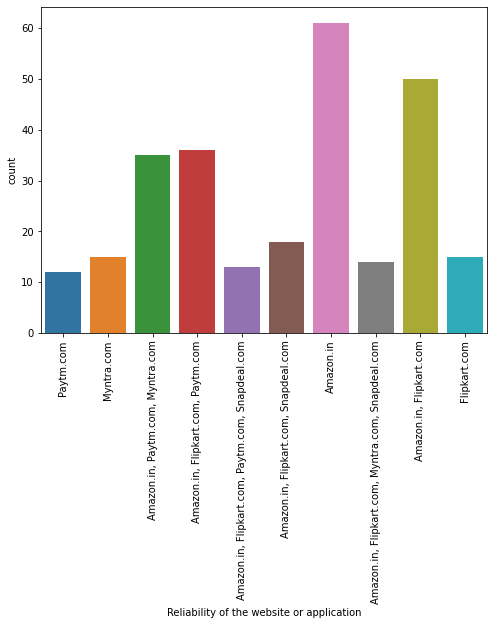

In [66]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Reliability of the website or application'])
plt.xticks(rotation=90)
plt.show()

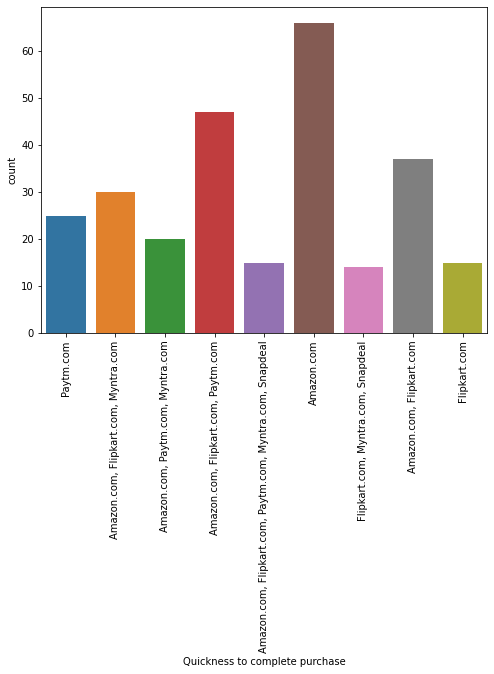

In [67]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Quickness to complete purchase'])
plt.xticks(rotation=90)
plt.show()

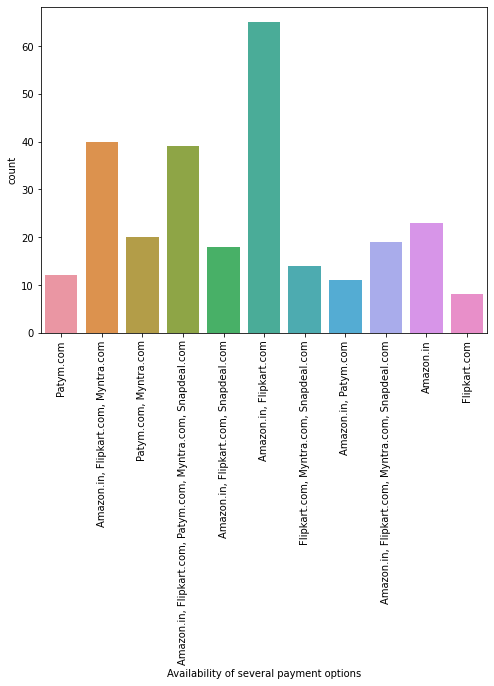

In [68]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Availability of several payment options'])
plt.xticks(rotation=90)
plt.show()

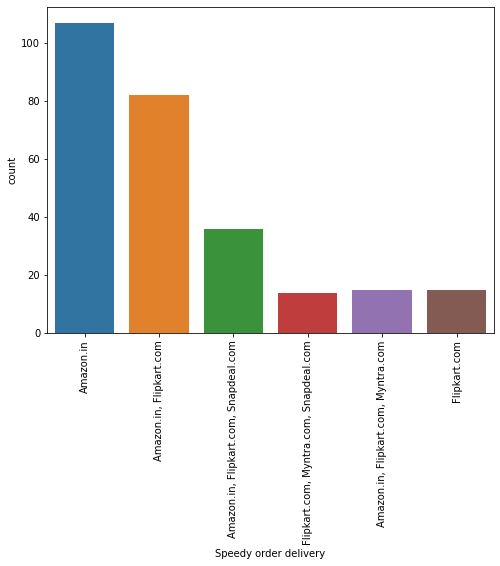

In [69]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Speedy order delivery'])
plt.xticks(rotation=90)
plt.show()

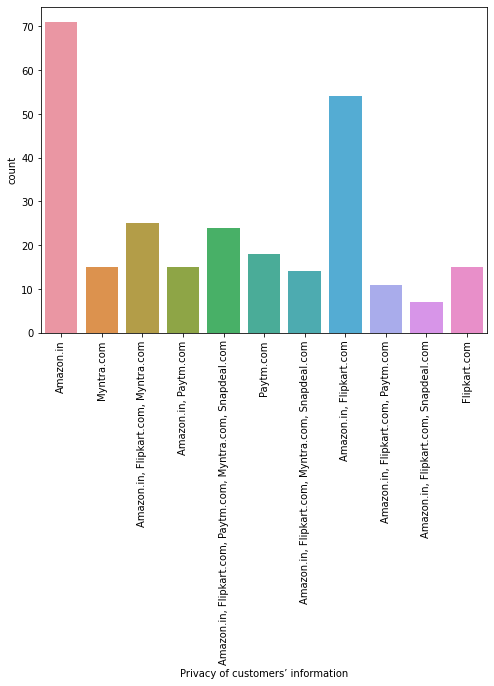

In [70]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Privacy of customers’ information'])
plt.xticks(rotation=90)
plt.show()

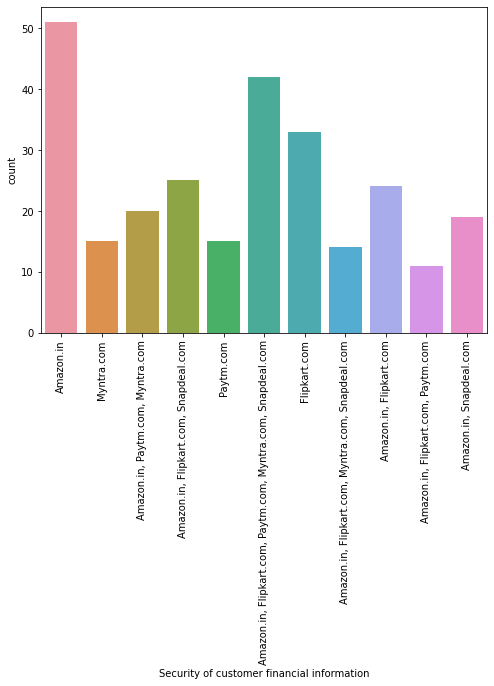

In [71]:
    plt.subplots(figsize=(8,6))
    sns.countplot(df['Security of customer financial information'])
    plt.xticks(rotation=90)
    plt.show()

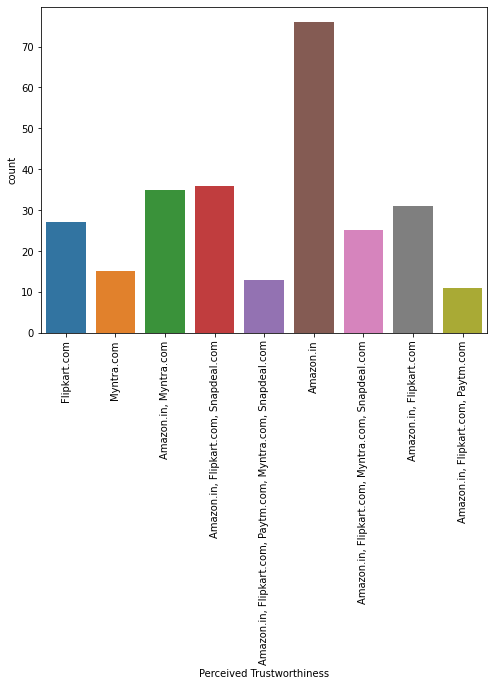

In [72]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Perceived Trustworthiness'])
plt.xticks(rotation=90)
plt.show()

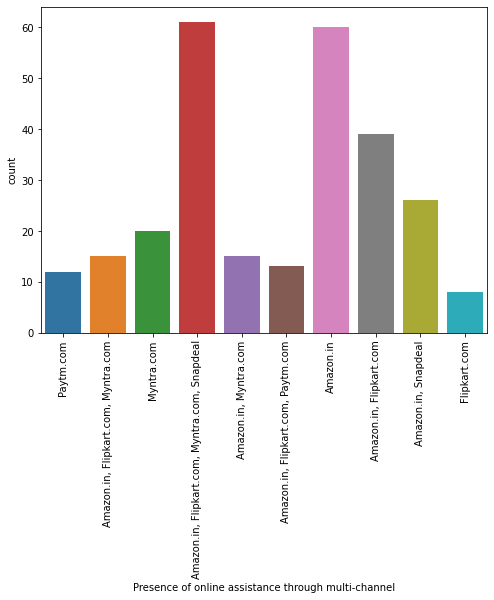

In [73]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Presence of online assistance through multi-channel'])
plt.xticks(rotation=90)
plt.show()

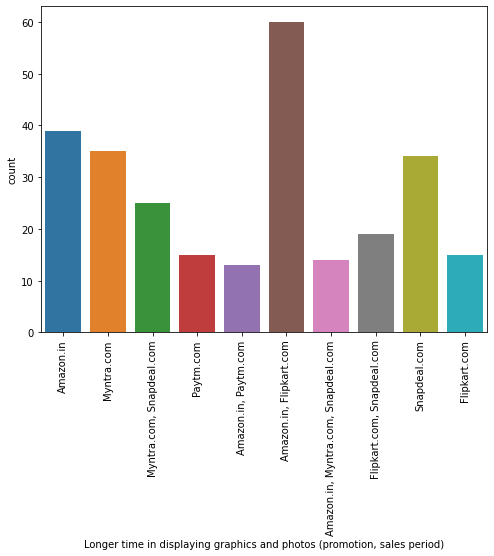

In [74]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Longer time in displaying graphics and photos (promotion, sales period)'])
plt.xticks(rotation=90)
plt.show()

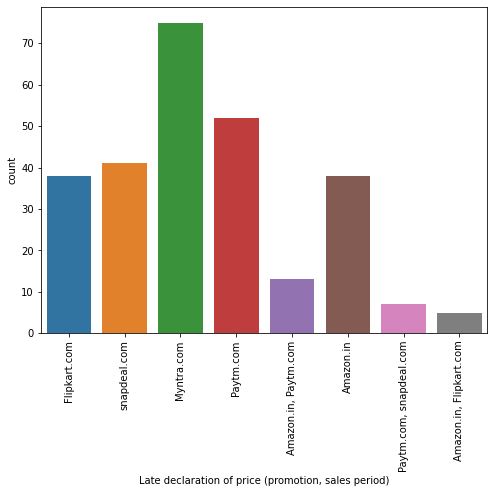

In [75]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Late declaration of price (promotion, sales period)'])
plt.xticks(rotation=90)
plt.show()

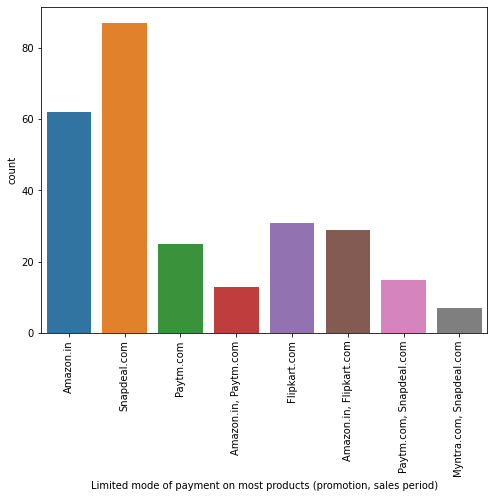

In [76]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Limited mode of payment on most products (promotion, sales period)'])
plt.xticks(rotation=90)
plt.show()

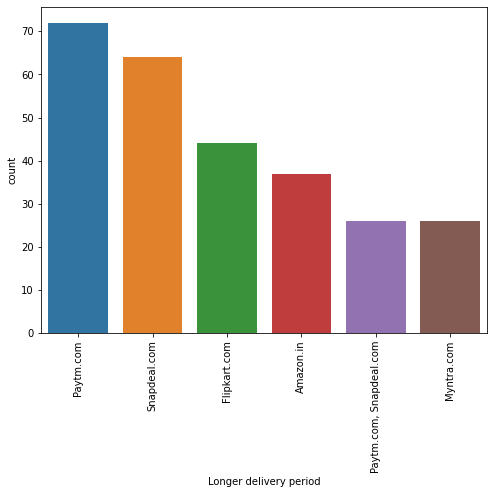

In [77]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Longer delivery period'])
plt.xticks(rotation=90)
plt.show()

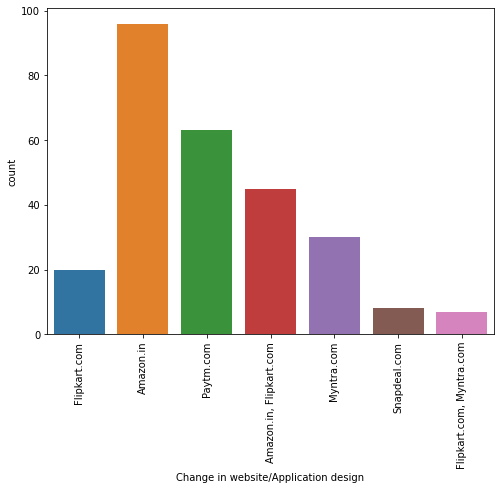

In [78]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Change in website/Application design'])
plt.xticks(rotation=90)
plt.show()

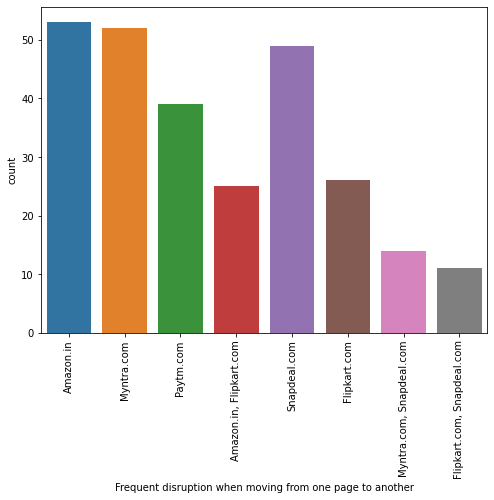

In [79]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Frequent disruption when moving from one page to another'])
plt.xticks(rotation=90)
plt.show()

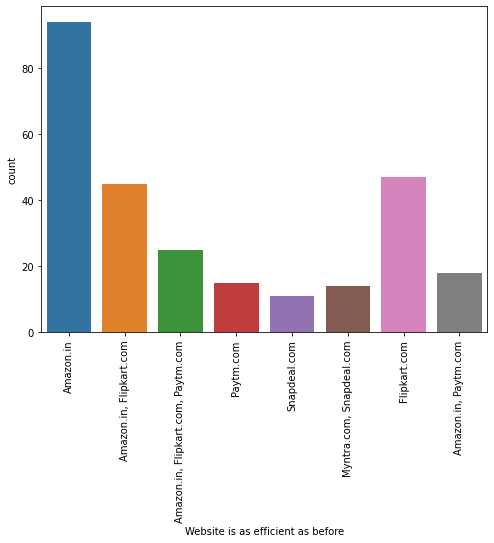

In [80]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Website is as efficient as before'])
plt.xticks(rotation=90)
plt.show()

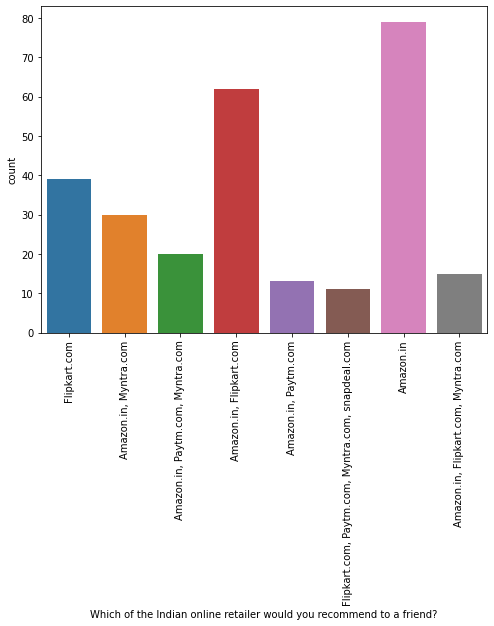

In [81]:
plt.subplots(figsize=(8,6))
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Data Analysis '}, xlabel='3 Which city do you shop online from?', ylabel='1Gender of respondent'>

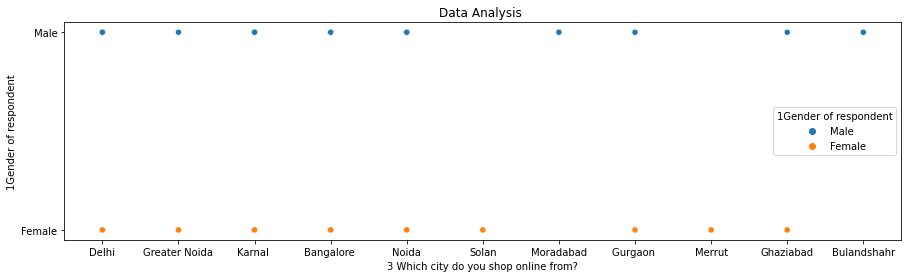

In [82]:
plt.figure(figsize=[15,4])
plt.title('Data Analysis ')
sns.scatterplot(df['3 Which city do you shop online from?'],df['1Gender of respondent'],hue=df['1Gender of respondent'])

<AxesSubplot:title={'center':'Data Analysis '}, xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='3 Which city do you shop online from?'>

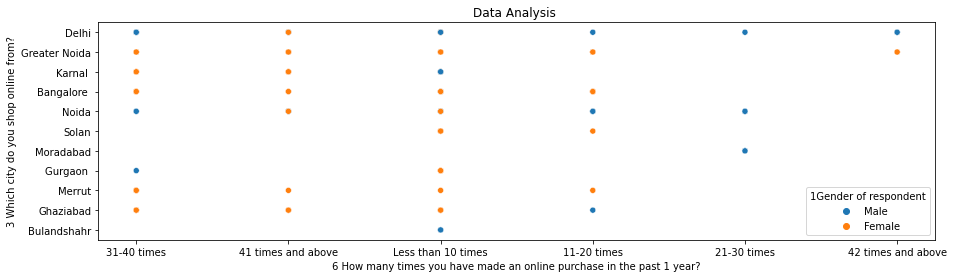

In [83]:
plt.figure(figsize=[15,4])
plt.title('Data Analysis ')
sns.scatterplot(df['6 How many times you have made an online purchase in the past 1 year?'],df['3 Which city do you shop online from?'],hue=df['1Gender of respondent'])

<AxesSubplot:title={'center':'Data Analysis '}, xlabel='1Gender of respondent', ylabel='16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'>

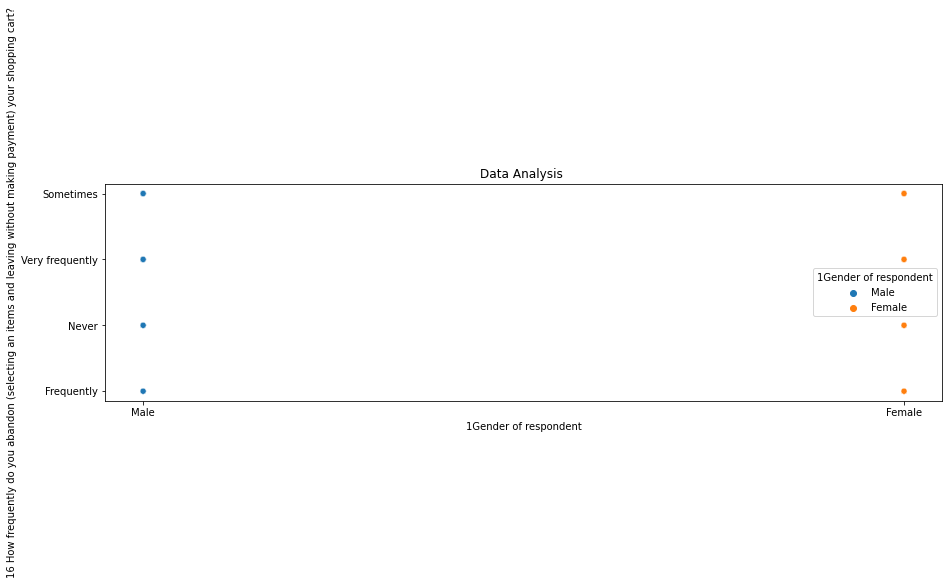

In [84]:
plt.figure(figsize=[15,4])
plt.title('Data Analysis ')
sns.scatterplot(df['1Gender of respondent'],df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'],hue=df['1Gender of respondent'])

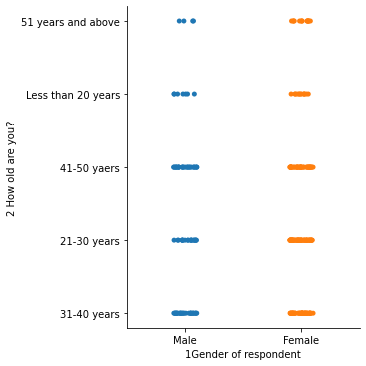

In [87]:
sns.catplot(x='1Gender of respondent',y='2 How old are you?',data=df)

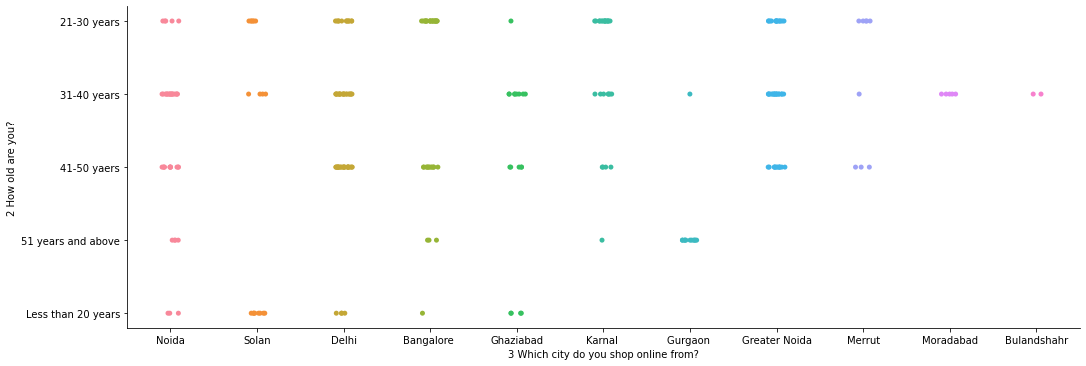

In [94]:
sns.catplot(x='3 Which city do you shop online from?',y='2 How old are you?',data = df.sort_values("2 How old are you?", ascending = False), height = 5, aspect = 3)

In [ ]:
Observations:
